In [2]:
import torch  # PyTorch 라이브러리
import numpy  # NumPy 라이브러리 (현재 코드에서는 사용되지 않음)
from torch.utils.data import Dataset  # PyTorch의 데이터셋 관련 모듈

# 입력 데이터 텐서 생성: 0부터 11까지의 값을 6x2 텐서로 변환
t_x = torch.arange(6 * 2).view(6, 2)  # t_x = [[ 0,  1], [ 2,  3], [ 4,  5], [ 6,  7], [ 8,  9], [10, 11]]

# 레이블 텐서 생성: 0부터 5까지의 값
t_y = torch.arange(6)  # t_y = [0, 1, 2, 3, 4, 5]

# 사용자 정의 데이터셋 클래스 정의
class MyDataset(Dataset):
    def __init__(self, x, y):  # 데이터셋 초기화 메서드
        self.x = x  # 입력 데이터를 인스턴스 변수에 저장
        self.y = y  # 레이블 데이터를 인스턴스 변수에 저장
    
    def __len__(self):  # 데이터셋의 길이를 반환
        return len(self.y)  # 레이블의 개수를 기준으로 데이터셋 크기를 반환
    
    def __getitem__(self, idx):  # 인덱스에 해당하는 샘플을 반환
        return self.x[idx], self.y[idx]  # 입력 데이터와 레이블 데이터를 함께 반환

# MyDataset 클래스의 인스턴스를 생성
dataset = MyDataset(t_x, t_y)

# 데이터셋의 각 샘플을 순회하며 출력
for i, (x, y) in enumerate(dataset):  # enumerate를 사용해 인덱스와 샘플을 함께 가져옴
    print(f"sample {i}: {x}, {y}")  # 샘플 번호와 해당 입력 데이터 및 레이블을 출력


sample 0: tensor([0, 1]), 0
sample 1: tensor([2, 3]), 1
sample 2: tensor([4, 5]), 2
sample 3: tensor([6, 7]), 3
sample 4: tensor([8, 9]), 4
sample 5: tensor([10, 11]), 5


hello


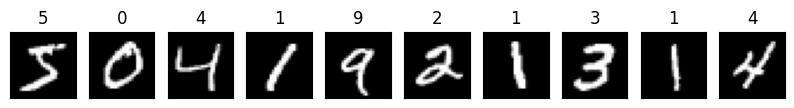

In [ ]:
import torchvision  # PyTorch의 컴퓨터 비전 관련 유틸리티 라이브러리
import matplotlib.pyplot as plt  # 데이터 시각화를 위한 라이브러리

# MNIST 데이터셋 로드
mnist_dataset = torchvision.datasets.MNIST(
    "./data",   # 데이터를 저장할 경로
    train=True,  # 학습용 데이터셋(True) 또는 테스트 데이터셋(False) 선택
    download=False  # 데이터셋을 다운로드할지 여부. False면 이미 다운로드된 데이터를 사용
)

# 1x10 크기의 서브플롯 생성, 이미지 크기 지정
fig, ax = plt.subplots(1, 10, figsize=(10, 20))  # 1행 10열의 서브플롯, 가로:10, 세로:20

# MNIST 데이터셋에서 첫 10개 샘플을 반복
for i, (image, label) in enumerate(mnist_dataset):  # 데이터셋에서 이미지와 레이블을 가져옴 --data가 없는 경우 MNIST download설정값을 true로 줘야 함.
    if i == 10:  # 10개 샘플만 처리
        break
    ax[i].set_xticks([])  # X축 눈금을 제거하여 깔끔한 표시
    ax[i].set_yticks([])  # Y축 눈금을 제거하여 깔끔한 표시
    ax[i].set_title(label)  # 이미지 위에 해당 숫자(레이블)를 제목으로 설정
    ax[i].imshow(image, cmap='gray')  # 이미지를 회색조(cmap='gray')로 표시


In [12]:
import torch  # PyTorch 라이브러리
from torch.utils.data import DataLoader  # PyTorch 데이터로더 모듈

# 1. 입력 데이터와 레이블 데이터 생성
t_x = torch.arange(6 * 2).view(6, 2)  # 0부터 11까지의 값으로 구성된 6x2 텐서 생성
# t_x = [[ 0,  1], [ 2,  3], [ 4,  5], [ 6,  7], [ 8,  9], [10, 11]]

t_y = torch.arange(6)  # 0부터 5까지의 값으로 구성된 레이블 텐서 생성
# t_y = [0, 1, 2, 3, 4, 5]

# 2. 텐서를 PyTorch 데이터셋으로 결합
dataset = torch.utils.data.TensorDataset(t_x, t_y)  # 입력 데이터와 레이블을 결합하여 데이터셋 생성

# 3. 데이터셋 순회 및 출력
for i, (x, y) in enumerate(dataset):  # 데이터셋에서 샘플(입력과 레이블)을 가져옴
    print(f"sample {i}: {x}, {y}")
# 출력:
# sample 0: tensor([0, 1]), 0
# sample 1: tensor([2, 3]), 1
# sample 2: tensor([4, 5]), 2
# sample 3: tensor([6, 7]), 3
# sample 4: tensor([8, 9]), 4
# sample 5: tensor([10, 11]), 5

print()

# 4. DataLoader를 사용하여 데이터셋을 배치로 로드
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)  # 배치 크기 2, 셔플 활성화

# 5. DataLoader 순회 및 배치 출력
for i, batch in enumerate(dataloader):  # DataLoader를 순회하며 배치를 가져옴
    print(f"batch {i}: {batch}")
# 출력 예시 (셔플로 인해 순서는 매번 달라짐):
# batch 0: [tensor([[10, 11], [ 2,  3]]), tensor([5, 1])]
# batch 1: [tensor([[ 6,  7], [ 0,  1]]), tensor([3, 0])]
# batch 2: [tensor([[ 4,  5], [ 8,  9]]), tensor([2, 4])]


sample 0: tensor([0, 1]), 0
sample 1: tensor([2, 3]), 1
sample 2: tensor([4, 5]), 2
sample 3: tensor([6, 7]), 3
sample 4: tensor([8, 9]), 4
sample 5: tensor([10, 11]), 5

batch 0: [tensor([[4, 5],
        [2, 3]]), tensor([2, 1])]
batch 1: [tensor([[6, 7],
        [8, 9]]), tensor([3, 4])]
batch 2: [tensor([[10, 11],
        [ 0,  1]]), tensor([5, 0])]


In [ ]:
import torch.nn as nn  # PyTorch의 신경망 모듈
import torch.nn.functional as F  # PyTorch의 함수형 API를 제공하는 모듈

# nn.Sequential: 순차적으로 레이어를 쌓아 모델을 구성하는 클래스
model = nn.Sequential( 
    nn.Flatten(),        # 입력 데이터를 1차원 벡터로 변환 (이미지 데이터를 처리할 때 사용)
    nn.Linear(784, 128), # 첫 번째 완전연결층 (784 입력 노드 -> 128 출력 노드)
    nn.ReLU(),           # ReLU 활성화 함수 (비선형성 추가)
    nn.Linear(128, 10),  # 두 번째 완전연결층 (128 입력 노드 -> 10 출력 노드)
    nn.Softmax(dim=1)    # 출력층에 Softmax 활성화 함수 (다중 클래스 분류 확률 계산)
)




In [ ]:
import torch.nn as nn

class MyModel12(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)  # 첫 번째 완전연결층
        self.ac1 = nn.ReLU()           # ReLU 활성화 함수
        self.fc2 = nn.Linear(128, 10)  # 두 번째 완전연결층
        self.ac2 = nn.Softmax(dim=1)   # Softmax 활성화 함수
    
    def forward(self, x):
        x = x.view(-1, 784)           # 입력 데이터 평탄화, -1은 배치 크기를 자동으로 계산
        x = self.ac1(self.fc1(x))     # 첫 번째 층 + ReLU
        x = self.ac2(self.fc2(x))     # 두 번째 층 + Softmax
        return x                      # 최종 결과 반환


In [18]:
import torch.optim as optim  # PyTorch의 최적화 알고리즘 모듈
import torch.nn as nn  # PyTorch의 신경망 모듈

# 1. 옵티마이저(Optimizer) 설정
optimizer = optim.SGD(model.parameters(), lr=0.01)  
# Stochastic Gradient Descent (SGD) 옵티마이저.
# model.parameters(): 모델의 학습 가능한 파라미터.
# lr=0.01: 학습률(learning rate).

# 2. 손실 함수 설정
criterion = nn.CrossEntropyLoss()  
# 다중 클래스 분류를 위한 손실 함수.
# 모델 출력(logits)과 정답 레이블(target)을 입력으로 받아 손실 계산.

# 3. 학습 루프 설정
for epoch in range(10):  # 총 10번의 학습(epoch)을 반복.
    model.train()  # 모델을 학습 모드로 전환 (배치 정규화, 드롭아웃 등 활성화).
    
    # 4. 배치 단위로 데이터 처리
    for batch_idx, (data, target) in enumerate(train_loader):  
        # train_loader: 배치 단위로 데이터를 로드하는 데이터 로더.
        # data: 입력 데이터(batch).
        # target: 해당 데이터의 정답 레이블(batch).

        # 4.1. 옵티마이저 초기화
        optimizer.zero_grad()  
        # 이전 배치에서 계산된 기울기(gradient)를 초기화.

        # 4.2. 모델 순전파(Forward Propagation)
        output = model(data)  
        # 데이터를 모델에 입력해 예측값(output) 계산.

        # 4.3. 손실 계산
        loss = criterion(output, target)  
        # 출력값(output)과 정답(target)을 비교해 손실(loss) 계산.

        # 4.4. 역전파(Backward Propagation)
        loss.backward()  
        # 손실 함수의 기울기를 계산하여 각 파라미터에 전달.

        # 4.5. 옵티마이저로 파라미터 업데이트
        optimizer.step()  
        # 계산된 기울기를 바탕으로 파라미터 업데이트.

        # 5. 진행 상황 출력
        if batch_idx % 100 == 0:  
            # 배치 인덱스가 100의 배수일 때 진행 상황 출력.
            print(f"Epoch {epoch}, Batch {batch_idx}, Loss {loss.item()}")  
            # 현재 에포크(epoch), 배치 인덱스(batch_idx), 손실 값(loss)을 출력.


NameError: name 'train_loader' is not defined

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# 1. 데이터셋 로드 및 전처리
# MNIST 데이터셋 다운로드 및 변환 설정
transform = transforms.Compose([
    transforms.ToTensor(),  # 이미지를 텐서로 변환 (값 범위 [0, 1])
    transforms.Normalize((0.5,), (0.5,))  # 평균 0.5, 표준편차 0.5로 정규화
])

train_dataset = datasets.MNIST(
    root='./data',  # 데이터 저장 경로
    train=True,  # 학습용 데이터셋 로드
    download=True,  # 데이터셋이 없으면 다운로드
    transform=transform  # 데이터 전처리 적용
)

# 2. DataLoader 생성
train_loader = DataLoader(
    train_dataset,  # 로드할 데이터셋
    batch_size=64,  # 한 배치당 샘플 개수
    shuffle=True  # 데이터를 무작위로 섞음
)

test_dataset = datasets.MNIST(
    root='./data', train=False, download=True, transform=transform
)  # 테스트용 데이터셋

test_loader = DataLoader(
    test_dataset, batch_size=64, shuffle=False
)  # 테스트용 데이터 로더

# 3. 모델 정의
class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # 입력: 784, 출력: 128
        self.relu = nn.ReLU()  # ReLU 활성화 함수
        self.fc2 = nn.Linear(128, 10)  # 입력: 128, 출력: 10 (클래스 수)
        self.softmax = nn.Softmax(dim=1)  # 확률 출력
        
    def forward(self, x):
        x = x.view(-1, 28 * 28)  # 평탄화 (batch_size, 28*28)
        x = self.fc1(x)  # 첫 번째 완전연결층
        x = self.relu(x)  # ReLU 활성화
        x = self.fc2(x)  # 두 번째 완전연결층
        x = self.softmax(x)  # Softmax로 확률 계산
        return x

# 4. 모델, 옵티마이저, 손실 함수 정의
model = SimpleNN()  # 모델 생성
optimizer = optim.SGD(model.parameters(), lr=0.01)  # SGD 옵티마이저, 학습률 0.01
criterion = nn.CrossEntropyLoss()  # 손실 함수 (다중 클래스 분류)

# 5. 학습 루프
for epoch in range(5):  # 총 5번의 에포크
    model.train()  # 학습 모드 설정
    for batch_idx, (data, target) in enumerate(train_loader):  # 배치 단위로 데이터 처리
        optimizer.zero_grad()  # 기울기 초기화
        output = model(data)  # 순전파 (예측값 계산)
        loss = criterion(output, target)  # 손실 계산
        loss.backward()  # 역전파로 기울기 계산
        optimizer.step()  # 파라미터 업데이트
        
        # 진행 상황 출력 (100번째 배치마다)
        if batch_idx % 100 == 0:
            print(f"Epoch {epoch}, Batch {batch_idx}, Loss {loss.item():.4f}")

print("Training complete!")


Epoch 0, Batch 0, Loss 2.3054
Epoch 0, Batch 100, Loss 2.2840
Epoch 0, Batch 200, Loss 2.2650
Epoch 0, Batch 300, Loss 2.2250
Epoch 0, Batch 400, Loss 2.2275
Epoch 0, Batch 500, Loss 2.1804
Epoch 0, Batch 600, Loss 1.9893
Epoch 0, Batch 700, Loss 2.0636
Epoch 0, Batch 800, Loss 2.0603
Epoch 0, Batch 900, Loss 1.9160
Epoch 1, Batch 0, Loss 2.0161
Epoch 1, Batch 100, Loss 1.9072
Epoch 1, Batch 200, Loss 1.9331
Epoch 1, Batch 300, Loss 1.8373
Epoch 1, Batch 400, Loss 1.8502
Epoch 1, Batch 500, Loss 1.9038
Epoch 1, Batch 600, Loss 1.8389
Epoch 1, Batch 700, Loss 1.7156
Epoch 1, Batch 800, Loss 1.7517
Epoch 1, Batch 900, Loss 1.7859
Epoch 2, Batch 0, Loss 1.7501
Epoch 2, Batch 100, Loss 1.7177
Epoch 2, Batch 200, Loss 1.8160
Epoch 2, Batch 300, Loss 1.7516
Epoch 2, Batch 400, Loss 1.7364
Epoch 2, Batch 500, Loss 1.7303
Epoch 2, Batch 600, Loss 1.7110
Epoch 2, Batch 700, Loss 1.7614
Epoch 2, Batch 800, Loss 1.7154
Epoch 2, Batch 900, Loss 1.7168
Epoch 3, Batch 0, Loss 1.7713
Epoch 3, Batch 1

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# 데이터 로드
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# 모델 정의
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)
        self.softmax = nn.Softmax(dim=1)  # Softmax 활성화 함수 추가
    
    def forward(self, x):
        x = x.view(-1, 28 * 28)  # 평탄화
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)  # Softmax 적용
        return x

model = SimpleNN()

# 옵티마이저와 손실 함수 설정
optimizer = optim.SGD(model.parameters(), lr=0.01)
criterion = nn.NLLLoss()  # NLLLoss는 Softmax가 포함된 출력에 사용

# 학습 루프
for epoch in range(1):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()  # 기울기 초기화
        output = model(data)  # 모델의 순전파
        loss = criterion(torch.log(output), target)  # Softmax 출력값의 로그를 사용
        loss.backward()  # 역전파
        optimizer.step()  # 가중치 업데이트
        
        if batch_idx % 100 == 0:
            print(f"Epoch {epoch}, Batch {batch_idx}, Loss {loss.item():.4f}")


Epoch 0, Batch 0, Loss 2.3383
Epoch 0, Batch 100, Loss 1.4366
Epoch 0, Batch 200, Loss 1.0369
Epoch 0, Batch 300, Loss 0.8166
Epoch 0, Batch 400, Loss 0.6544
Epoch 0, Batch 500, Loss 0.4954
Epoch 0, Batch 600, Loss 0.4688
Epoch 0, Batch 700, Loss 0.5600
Epoch 0, Batch 800, Loss 0.3980
Epoch 0, Batch 900, Loss 0.4978


In [24]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for data, target in test_loader : 
        ouput = model(data)
        predicted = torch.argmax(output, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

print(f"Accuracy: {correct / total}")

RuntimeError: The size of tensor a (32) must match the size of tensor b (64) at non-singleton dimension 0

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# 1. 데이터 로드 및 전처리
transform = transforms.Compose([
    transforms.ToTensor(),  # 이미지를 텐서로 변환
    transforms.Normalize((0.5,), (0.5,))  # 평균 0.5, 표준편차 0.5로 정규화
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)  # 학습용 데이터 로더
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)   # 테스트용 데이터 로더

# 2. 모델 정의
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # 첫 번째 완전연결층
        self.relu = nn.ReLU()               # ReLU 활성화 함수
        self.fc2 = nn.Linear(128, 10)       # 두 번째 완전연결층
        self.softmax = nn.Softmax(dim=1)    # 확률 계산용 Softmax
    
    def forward(self, x):
        x = x.view(-1, 28 * 28)             # 평탄화 (배치 크기, 28*28)
        x = self.fc1(x)                     # 첫 번째 완전연결층
        x = self.relu(x)                    # 활성화 함수 적용
        x = self.fc2(x)                     # 두 번째 완전연결층
        x = self.softmax(x)                 # Softmax를 적용해 확률 계산
        return x

model = SimpleNN()

# 3. 손실 함수 및 옵티마이저 설정
criterion = nn.CrossEntropyLoss()  # 다중 클래스 분류용 손실 함수
optimizer = optim.SGD(model.parameters(), lr=0.01)  # SGD 옵티마이저

# 4. 학습 루프
for epoch in range(5):  # 총 5 에포크
    model.train()  # 학습 모드 설정
    for batch_idx, (data, target) in enumerate(train_loader):  # 배치 단위로 처리
        optimizer.zero_grad()  # 기울기 초기화
        output = model(data)  # 순전파
        loss = criterion(output, target)  # 손실 계산
        loss.backward()  # 역전파로 기울기 계산
        optimizer.step()  # 가중치 업데이트
        
        if batch_idx % 100 == 0:  # 진행 상황 출력
            print(f"Epoch {epoch}, Batch {batch_idx}, Loss {loss.item():.4f}")

# 5. 모델 평가 (테스트 데이터셋 정확도 측정)
model.eval()  # 평가 모드 설정
correct = 0  # 정확히 맞춘 샘플 개수
total = 0    # 총 샘플 개수

with torch.no_grad():  # 기울기 비활성화 (메모리 절약)
    for data, target in test_loader:  # 테스트 데이터셋에서 배치 단위로 처리
        output = model(data)  # 예측값 계산
        predicted = torch.argmax(output, 1)  # 가장 높은 확률을 가진 클래스 선택
        total += target.size(0)  # 총 샘플 수 누적
        correct += (predicted == target).sum().item()  # 정답 개수 누적

# 정확도 출력
print(f"Accuracy: {correct / total:.4f}")


Epoch 0, Batch 0, Loss 2.3066
Epoch 0, Batch 100, Loss 2.2883
Epoch 0, Batch 200, Loss 2.2847
Epoch 0, Batch 300, Loss 2.2371
Epoch 0, Batch 400, Loss 2.2297
Epoch 0, Batch 500, Loss 2.2023
Epoch 0, Batch 600, Loss 2.1134
Epoch 0, Batch 700, Loss 2.0939
Epoch 0, Batch 800, Loss 2.0108
Epoch 0, Batch 900, Loss 2.0105
Epoch 1, Batch 0, Loss 2.0414
Epoch 1, Batch 100, Loss 2.0468
Epoch 1, Batch 200, Loss 1.8658
Epoch 1, Batch 300, Loss 1.9393
Epoch 1, Batch 400, Loss 1.9065
Epoch 1, Batch 500, Loss 1.8551
Epoch 1, Batch 600, Loss 1.8114
Epoch 1, Batch 700, Loss 1.8970
Epoch 1, Batch 800, Loss 1.7311
Epoch 1, Batch 900, Loss 1.8475
Epoch 2, Batch 0, Loss 1.7820
Epoch 2, Batch 100, Loss 1.8247
Epoch 2, Batch 200, Loss 1.7202
Epoch 2, Batch 300, Loss 1.7336
Epoch 2, Batch 400, Loss 1.7500
Epoch 2, Batch 500, Loss 1.7704
Epoch 2, Batch 600, Loss 1.8096
Epoch 2, Batch 700, Loss 1.7522
Epoch 2, Batch 800, Loss 1.7076
Epoch 2, Batch 900, Loss 1.7173
Epoch 3, Batch 0, Loss 1.7264
Epoch 3, Batch 1